# Методы анализа и обработки изображения

---

ЛР4 - Работа с шумом изображения

Студентка гр. РИМ-181226

Бабайлова Маргарита Леонидовна

In [5]:
from skimage.io import imread, imshow, imsave
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, disk, skeletonize
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

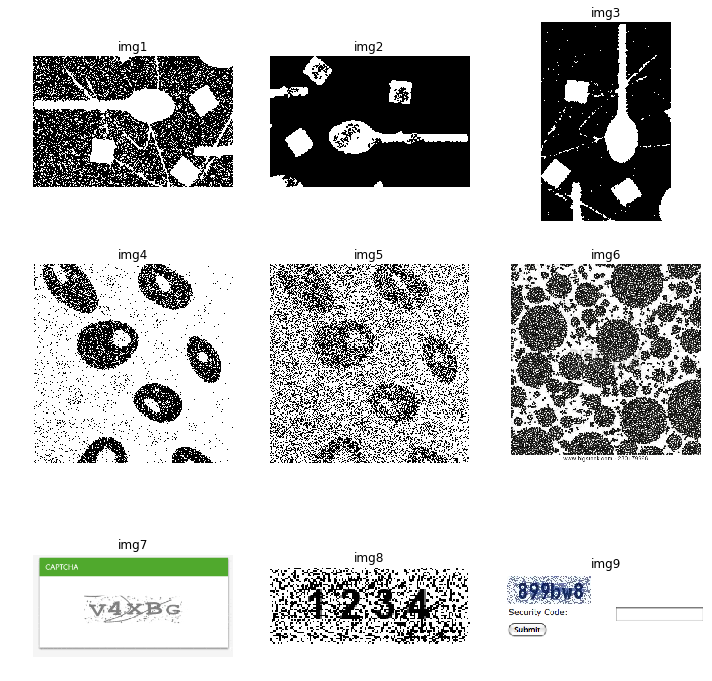

In [11]:
fig = plt.figure(figsize=(10, 10))
img1 = imread('1.png')
fig.add_subplot(3, 3, 1)
plt.axis('off')
imshow(img1)
plt.title('img1')
img2 = imread('2.png')
fig.add_subplot(3, 3, 2)
plt.axis('off')
imshow(img2)
plt.title('img2')
img3 = imread('3.png')
fig.add_subplot(3, 3, 3)
plt.axis('off')
imshow(img3)
plt.title('img3')
img4 = imread('4.png')
fig.add_subplot(3, 3, 4)
plt.axis('off')
imshow(img4)
plt.title('img4')
img5 = imread('5.png')
fig.add_subplot(3, 3, 5)
plt.axis('off')
imshow(img5)
plt.title('img5')
img6 = imread('6.jpg')
fig.add_subplot(3, 3, 6)
plt.axis('off')
imshow(img6)
plt.title('img6')
img7 = imread('7.png')
fig.add_subplot(3, 3, 7)
plt.axis('off')
imshow(img7)
plt.title('img7')
img8 = imread('8.png')
fig.add_subplot(3, 3, 8)
plt.axis('off')
imshow(img8)
plt.title('img8')
img9 = imread('9.png')
fig.add_subplot(3, 3, 9)
plt.axis('off')
imshow(img9)
plt.title('img9')
plt.show()

Найти внутренние и внешние границы изображений 1 – 3, шум удалить.

In [7]:
def calculate_error(img, selem=False, mode='erosion'):
    if mode == 'erosion':
        img_er_bin = binary_erosion(img, selem=np.ones(selem)) if selem else binary_erosion(img)
    elif mode == 'dilation':
        img_er_bin = binary_dilation(img, selem=np.ones(selem)) if selem else binary_dilation(img)
    elif mode == 'closing':
        img_er_bin = binary_closing(img, selem=np.ones(selem)) if selem else binary_closing(img)
    elif mode == 'opening':
        img_er_bin = binary_opening(img, selem=np.ones(selem)) if selem else binary_opening(img)
    img_er = np.ones(img_er_bin.shape)
    return img_er*img_er_bin

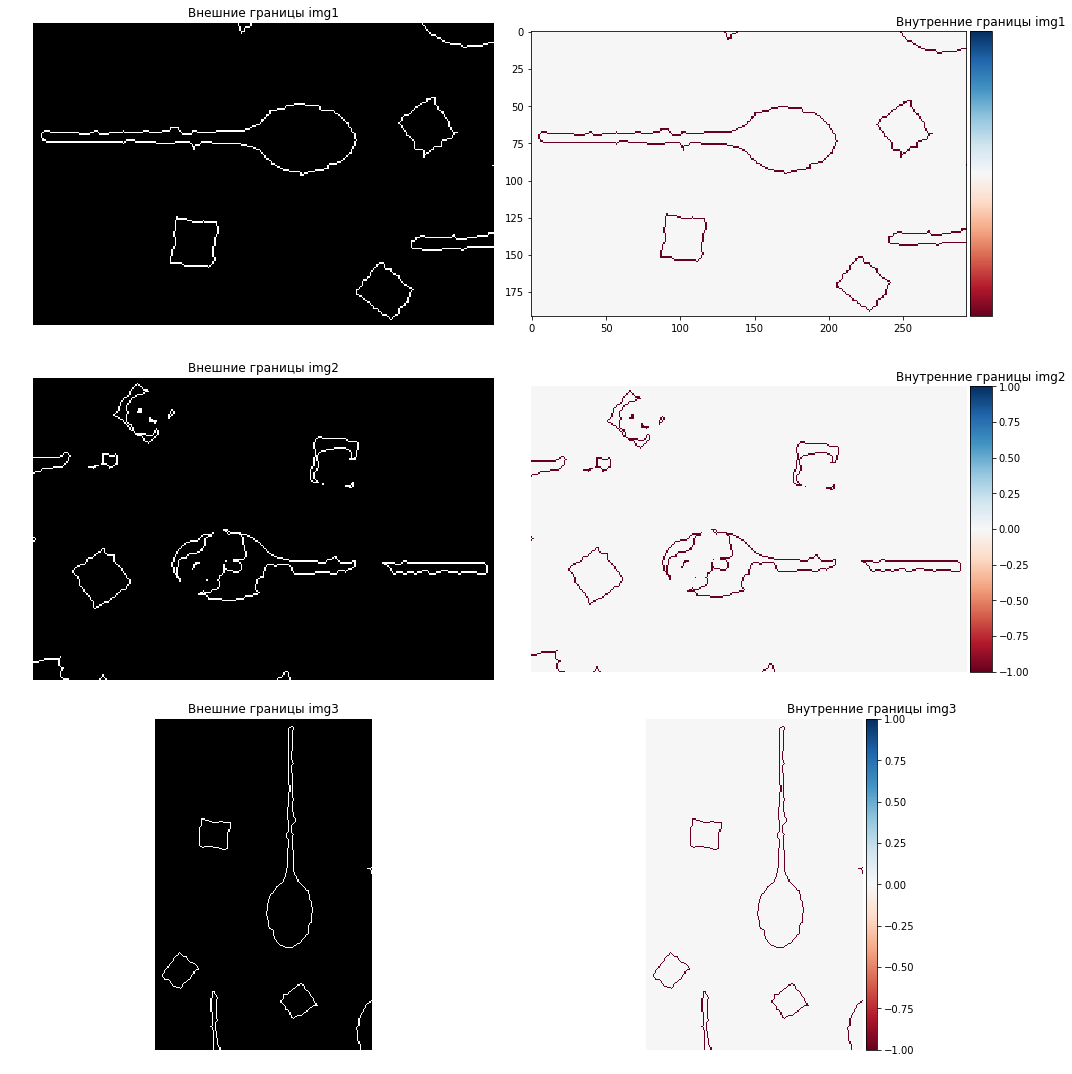

In [12]:
img1_er = calculate_error(rgb2gray(img1), (6,6))
img1_er_er = calculate_error(img1_er)
img2_er = calculate_error(rgb2gray(img2), (4,4))
img2_er_er = calculate_error(img2_er)
img3_er = calculate_error(rgb2gray(img3), (7,7))
img3_er_er = calculate_error(img3_er)
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(3, 2, 1)
plt.axis('off')
imshow(img1_er-img1_er_er)
plt.title('Внешние границы img1')
fig.add_subplot(3, 2, 2)
imshow(img1_er_er-img1_er)
plt.axis('off')
plt.title('Внутренние границы img1')
fig.add_subplot(3, 2, 3)
plt.axis('off')
imshow(img2_er-img2_er_er)
plt.title('Внешние границы img2')
fig.add_subplot(3, 2, 4)
plt.axis('off')
imshow(img2_er_er-img2_er)
plt.title('Внутренние границы img2')
fig.add_subplot(3, 2, 5)
plt.axis('off')
imshow(img3_er-img3_er_er)
plt.title('Внешние границы img3')
fig.add_subplot(3, 2, 6)
plt.axis('off')
imshow(img3_er_er-img3_er)
plt.title('Внутренние границы img3')
plt.show()

Удалить шум с 4-6 изображений.

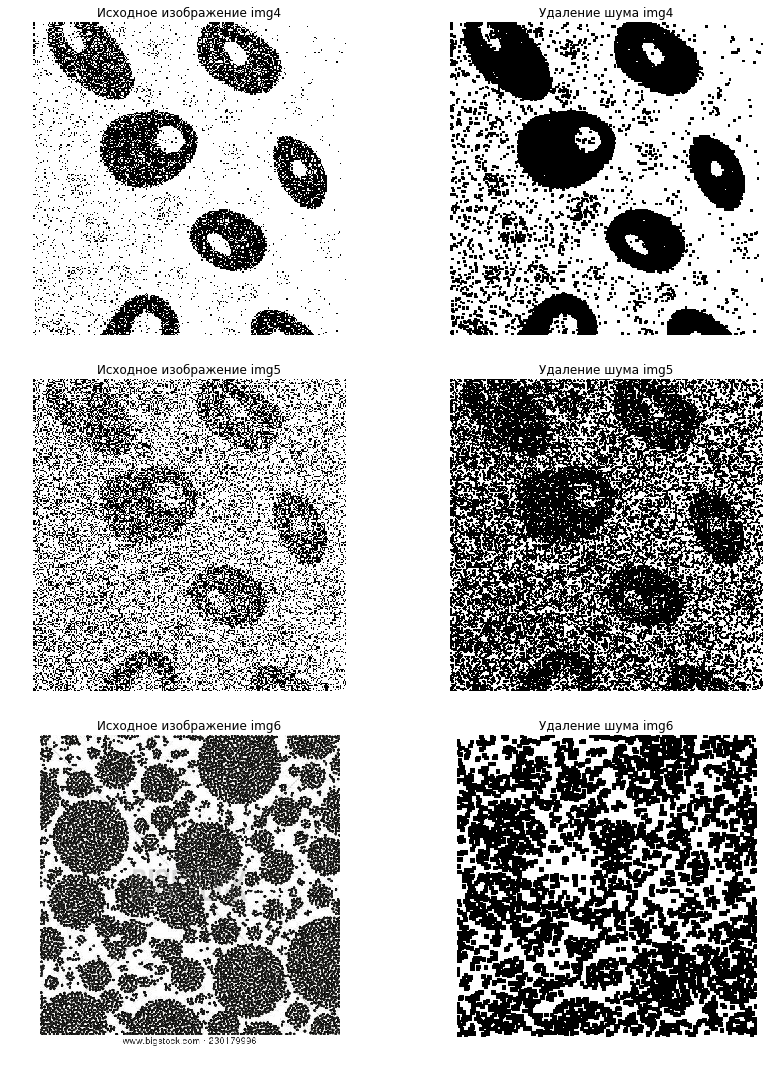

In [13]:
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(3, 2, 1)
plt.axis('off')
imshow(img4)
plt.title('Исходное изображение img4')
fig.add_subplot(3, 2, 2)
plt.axis('off')
imshow(calculate_error(rgb2gray(img4), (4,4)))
plt.title('Удаление шума img4')
fig.add_subplot(3, 2, 3)
plt.axis('off')
imshow(img5)
plt.title('Исходное изображение img5')
fig.add_subplot(3, 2, 4)
plt.axis('off')
imshow(calculate_error(rgb2gray(img5)))
plt.title('Удаление шума img5')
fig.add_subplot(3, 2, 5)
plt.axis('off')
imshow(img6)
plt.title('Исходное изображение img6')
fig.add_subplot(3, 2, 6)
plt.axis('off')
imshow(calculate_error(rgb2gray(img6), (7,7)))
plt.title('Удаление шума img6')
plt.show()

Убрать шум с капч 7-9.

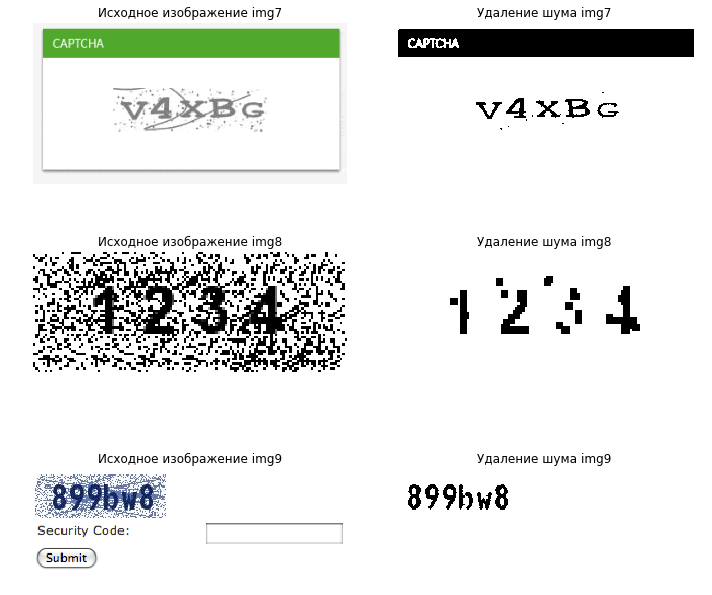

In [14]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(3, 2, 1)
plt.axis('off')
imshow(img7)
plt.title('Исходное изображение img7')
fig.add_subplot(3, 2, 2)
plt.axis('off')
imshow(calculate_error(rgb2gray(img7)>0.6, mode='closing'))
plt.title('Удаление шума img7')
fig.add_subplot(3, 2, 3)
plt.axis('off')
imshow(img8)
plt.title('Исходное изображение img8')
fig.add_subplot(3, 2, 4)
plt.axis('off')
imshow(calculate_error(rgb2gray(img8), (3,3), mode='closing'))
plt.title('Удаление шума img8')
fig.add_subplot(3, 2, 5)
plt.axis('off')
imshow(img9)
plt.title('Исходное изображение img9')
fig.add_subplot(3, 2, 6)
plt.axis('off')
imshow(calculate_error(rgb2gray(img9)>0.3, mode='closing'))
plt.title('Удаление шума img9')
plt.show()